In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

Using TensorFlow backend.


SMOTE,R.U.S is done on numpyarray features

In [2]:
# This is straightforward..play around with it printing X to see how the data changes with change in the parameters values.
data = make_classification(n_samples=10000, n_redundant=0, n_repeated=0, n_features=2, 
                       n_clusters_per_class=1, flip_y=0, weights =[0.99], random_state=1)

In [3]:
#can easily split into X, y since it is a numpy array instead of using slice
X, y = data

In [4]:
X,y

(array([[0.22201371, 0.54020654],
        [1.34743875, 1.41282352],
        [0.53723817, 0.37273043],
        ...,
        [1.87813003, 0.82950037],
        [2.58593336, 1.92799501],
        [1.1233558 , 1.04575545]]), array([0, 0, 0, ..., 0, 0, 0]))

In [5]:
y.shape

(10000,)

In [6]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
X.shape

(10000, 2)

In [8]:
X

array([[0.22201371, 0.54020654],
       [1.34743875, 1.41282352],
       [0.53723817, 0.37273043],
       ...,
       [1.87813003, 0.82950037],
       [2.58593336, 1.92799501],
       [1.1233558 , 1.04575545]])

In [9]:
# A collection function, it returns a dictionary-like object 
#it counts key values pair in an object and returns a dictionary
#cannot use value_counts to check unique values here because it is a numpyarray
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


The next few cells would help us understand our data and how to make the scatter

In [10]:
row_ix = np.where(y==0)[0]
print(f'The indexes where the label is zero:{row_ix} \n\n and the length is: {len(row_ix)}')
    

The indexes where the label is zero:[   0    1    2 ... 9997 9998 9999] 

 and the length is: 9900


In [11]:
row_ix = np.where(y==1)[0]
print(f'The indexes where the label is one=:\n\n{row_ix} \n\n\nand the length is: {len(row_ix)}')

The indexes where the label is one=:

[ 207  649  843 1017 1098 1155 1306 1308 1325 1374 1561 1583 1632 1720
 1811 1813 1890 1962 1963 2034 2061 2093 2115 2138 2312 2362 2475 2703
 2713 2961 3060 3170 3196 3309 3407 3562 3598 3600 3708 3812 3911 4047
 4122 4130 4189 4571 4587 4650 5017 5116 5244 5297 5357 5444 5451 5612
 5783 5912 5917 5988 6021 6111 6120 6253 6387 6502 6591 6695 6829 7011
 7168 7251 7329 7336 7356 7360 7392 7468 7584 7668 7984 8168 8322 8378
 8405 8429 8499 8554 8668 8720 8859 9005 9048 9092 9093 9160 9498 9613
 9803 9909] 


and the length is: 100


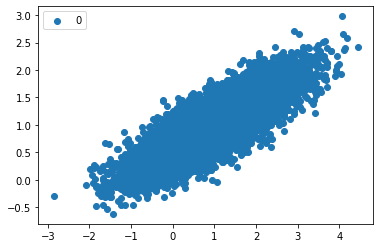

In [12]:
#the scatter plot of where y=0 
#X[row_ix, 0] is the first index where y=0 
#is plot against
#X[row_ix, 1] is the second index/feature/column where y=0
row_ix = np.where(y==0)[0]
plt.scatter(X[row_ix, 0], X[row_ix, 1], label=0)
plt.legend()

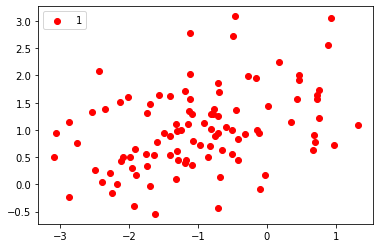

In [13]:
#the scatter plot of where y=1

row_ix = np.where(y==1)[0] 
plt.scatter(X[row_ix, 0], X[row_ix, 1], label=1, color ='red')
plt.legend()

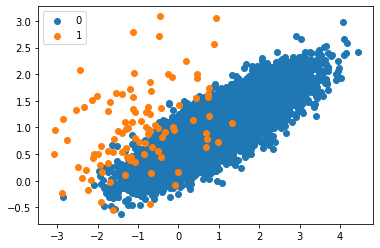

In [14]:
#the two plots now

for label, _ in counter.most_common():
        row_ix = np.where(y==label)[0] 
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()

NOW LET'S BALANCE OUR MODEL

In [15]:
#1. SMOTE
from imblearn.over_sampling import SMOTE
smotee =SMOTE()
X, y= smotee.fit_sample(X,y)  #fit sample beacuse we're oversampling, hence the total length of the dataset doesnt change


In [16]:
counter1 = Counter(y)
print(counter1)  #done

Counter({0: 9900, 1: 9900})


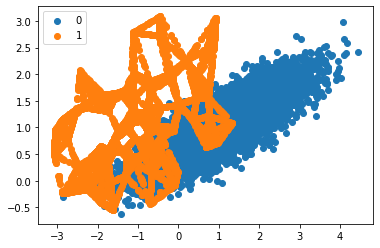

In [17]:
#let's visualize
#it can be seen that class1 points increased in the colour orange

for label, _ in counter1.most_common():
    row_ix = np.where(y==label)
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()

In [18]:
#let's undersample
#PIPELINE TAKES IN A SERIES OF ACTIONS YOU WANT TO PERFORM ON YOUR DATA.
#NOW WE WANT TO OVERSAMPLE AND UNDERSAMPLE
'''
sampling strategy is how you want to resample your data:
if float, its like how many percent of the majority class do you want to build the minority class to,
if string, there are only (minority, majority, not minority, not majority/auto and all),
and they mean what do you want to sample gan gan
'''
#undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)

#summarize class distribution
counter = Counter(y)
print(counter)

#define the pipeline steps
#SMOTE deals with the minority class, so tweak the hperparamter to increase it because it is the minority btwn the two classes
#RandomUnderSampler parameter can also be tweaked in a way that kind of reduces the number of its majority but not neccesarily the same number with the minority
over = SMOTE(sampling_strategy=0.1)  #This is to increase the number of the minority class by 0.1% so that when we eventually undersample, our data isnt too small
under = RandomUnderSampler(sampling_strategy=0.5) #we want the majority class to be twice the minority class
steps = [('over',over), ('under', under)] #the step of the pipeline, https://youtu.be/BiBFQbII7ys for better understanding.. the smote and r.u.s equated to steps
pipe = Pipeline(steps = steps) #instantiate with smote and r.u.s parameters evaluated in steps

#now, fit the data on the pipeline like you'd for SMOTE
X, y = pipe.fit_resample(X, y)


#let's check the counter for feedback after the pipeline..Counter returns a dict
counter = Counter(y)
print(counter)


Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


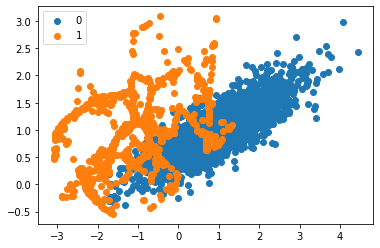

In [19]:
#let's recheck scatter plot
for label, _ in counter.items():
    row_ix = np.where(y==label)[0] 
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()

TYPES OF SMOTE

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


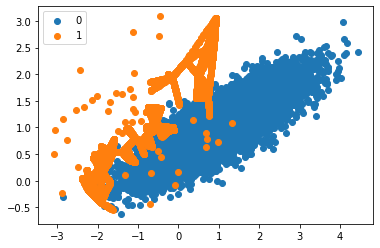

In [20]:
#1. BORDERLINE SMOTE
#straightforward....


from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE
from numpy import where

#define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)

#summarize class distribution
counter =Counter(y)
print(counter)

borderline_smote = BorderlineSMOTE()
X, y =borderline_smote.fit_sample(X, y)

#summarize new class distribution
counter =Counter(y)
print(counter)

#let's visualize
for label, _ in counter.most_common():
    row_ix = where(y==label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


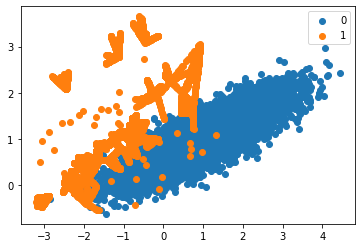

In [21]:
#2. BORDERLINE SMOTESVM
#same proceedure


from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from imblearn.over_sampling import SVMSMOTE
from numpy import where

#define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)

#summarize class distribution
counter =Counter(y)
print(counter)

borderline_smote = SVMSMOTE()
X, y =borderline_smote.fit_sample(X, y)

#summarize new class distribution
counter =Counter(y)
print(counter)

#let's visualize
for label, _ in counter.most_common():
    row_ix = where(y==label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


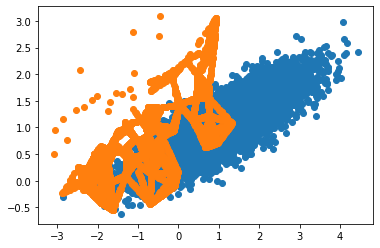

In [22]:
#ADASYN
#same logic

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.over_sampling import ADASYN
from numpy import where

#define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)
#summarize class distribution
counter =Counter(y)
print(counter)

#transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

#summarize new class distribution
counter =Counter(y)
print(counter)

#scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y==label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend
pyplot.show()

For the second class, we used modules like decisiontree, cross_val_score, RepeatedStratifiedKFold.
I will try to explain them.A voicenote would be better though.

Decisiontree:
    just a normal model like linearRegression and logisticRegression

RepeatedStratifiedKFold: A cross validation method
    -Not exactly easy to explain, it has variances (KFold, RepeatedKFold, StratifedKFold and RepeatedStratifiedKFold)
    
    -KFold is the most basic, they all take three parameters, n_splits, n_repeats and random_state
    - what it does is it splits your data into k number of groups and takes one group as test data and takes the others as
      train data, it does this for all the groups..you see thaat that way all datapoints get to be test_data and train data       and it does not use all your data (well depending how you configure it) and   biasness is greatly reduced
    

cross_val_score:
    - It's used evaluate a cross validation method, just as accuracy_score does or MAE, MSE and RMSE
    - it's parametes; 
      Estimator: the model you want in training your data, (you could pass in a pipeline)
      X and y: your label and target
      Scorer: What method do you want to use to evaluate it. (Use sklearn.metrics.SCORERS.keys() to check the available    scorers) check the scikit-learn documentation for more understanding
      -CV: just like sampling_strategy, this is your cross validation strategy or simply how you want your data divided. (that's where we'd use RepeatedStratifiedKFold)
     
n_job:
    - The number of CPUs you want to use, None means use one processor and -1 means use all processors




In [23]:
#This is just to view the output of using the evaluation method..bother about the output only
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
#define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)
#define model
model = DecisionTreeClassifier()
#evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores)

[0.6979798  0.89646465 0.8469697  0.7459596  0.7989899  0.69747475
 0.8479798  0.6989899  0.7469697  0.69747475 0.79545455 0.9479798
 0.6989899  0.94646465 0.74747475 0.74747475 0.5979798  0.7979798
 0.79747475 0.69646465 0.74949495 0.74747475 0.8969697  0.8989899
 0.64545455 0.64949495 0.74747475 0.6479798  0.9479798  0.6979798 ]


In [24]:
#DecisionTree evaluated on an imbalanced data wihtout smote

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
#define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)
#define model
model = DecisionTreeClassifier()
#evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean ROC AUC: {mean(scores):.3f}%')

Mean ROC AUC: 0.764%


In [25]:
#decision tree evaluated on imbalanced dataset with smote oversampling
#This is to see that SMOTE increases accuracy

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps = steps)

#evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean ROC AUC: {mean(scores):.3f}%')

C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mean ROC AUC: 0.827%


In [26]:
# DecisionTree evaluated on an imbalanced data with smote oversampling and random undersampling
#This has even higher accuracy after using SMOTE & r.u.s

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)


#define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model',model)]
pipeline = Pipeline(steps = steps)


#evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean ROC AUC: {mean(scores):.3f}%')


Mean ROC AUC: 0.836%


In [27]:
#In the next code block,
#X has two #numpyarray columns of 10000 values

#y has 2 imbalanced classes;0,1
#SMOTE increases the minority class by 0.1 and also iterate by k in k_values
#R.U.S converts the majority class to twice of the minority
#model is the model used
#everything goes tru the pipeline
#cross validation is done using the pipeline and cv=repeatedstratifiedkfold
#mean score is calculated

In [28]:
#playing around the number of folds with DecisionTree evaluated on an imbalanced data with smote oversampling and random undersampling

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)
print(X)
print(y)

#values to evaluate
k_values = [1,2,3,4,5,6,7]
for k in k_values:
    #define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model',model)]
    pipeline = Pipeline(steps = steps)
    
    #evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))


[[0.22201371 0.54020654]
 [1.34743875 1.41282352]
 [0.53723817 0.37273043]
 ...
 [1.87813003 0.82950037]
 [2.58593336 1.92799501]
 [1.1233558  1.04575545]]
[0 0 0 ... 0 0 0]
> k=1, Mean ROC AUC: 0.824
> k=2, Mean ROC AUC: 0.824
> k=3, Mean ROC AUC: 0.833
> k=4, Mean ROC AUC: 0.828
> k=5, Mean ROC AUC: 0.848
> k=6, Mean ROC AUC: 0.853
> k=7, Mean ROC AUC: 0.846
